# **What is Naïve Bayes: Step-by-Step Example**

Let's create a **toy dataset**, apply **Naïve Bayes step by step**, and use it for **prediction**.

---

## **Step 1: Creating a Toy Dataset**
Imagine we're predicting whether a person **buys a sports car** based on their **age** and **income level**.

| Age  | Income  | Buys Sports Car? |
|------|--------|----------------|
| Young  | High    | Yes            |
| Young  | Medium  | No             |
| Young  | Low     | No             |
| Middle | High    | Yes            |
| Middle | Medium  | No             |
| Middle | Low     | No             |
| Old    | High    | No             |
| Old    | Medium  | No             |
| Old    | Low     | No             |

---

## **Step 2: Calculate Prior Probabilities**
We compute how often each class (`Buys_Sports_Car = Yes/No`) appears in the dataset.

**Prior probabilities**:

- **P(Buys_Sports_Car = No) = 0.78** (7 out of 9 people didn’t buy a sports car)
- **P(Buys_Sports_Car = Yes) = 0.22** (2 out of 9 people bought a sports car)

---

## **Step 3: Compute Likelihoods P(X | Y)**
We calculate how likely each feature value is given that a person **buys** or **doesn't buy** a sports car.

### **Likelihood Probabilities**
For **Age**:
- **If No (doesn’t buy a car)**:
  - Middle: **28.6%**
  - Old: **42.9%**
  - Young: **28.6%**
- **If Yes (buys a car)**:
  - Middle: **50%**
  - Young: **50%**

For **Income**:
- **If No**:
  - High: **14.3%**
  - Medium: **42.9%**
  - Low: **42.9%**
- **If Yes**:
  - High: **100%** (All buyers had high income)

---

## **Step 4: Make a Prediction!**
Let’s predict whether a **Young person with High income** will buy a sports car. We'll use **Bayes' Theorem**:

$P(Y|X) = \frac{P(X|Y) P(Y)}{P(X)}$

Since **P(X)** is the same for all classes, we only need to compute:

$P(Y=Yes | X) \propto P(Age=Young | Yes) \times P(Income=High | Yes) \times P(Yes)$

$P(Y=No | X) \propto P(Age=Young | No) \times P(Income=High | No) \times P(No)$

### **Compute Posterior Probabilities**
- **P(Buys Sports Car = Yes)**:
  - $P(Age=Young | Yes) = 0.5$
  - $P(Income=High | Yes) = 1.0$
  - $P(Yes) = 0.22$
  - **Posterior (Yes) = 0.5 × 1.0 × 0.22 = 0.11**

- **P(Buys Sports Car = No)**:
  - $P(Age=Young | No) = 0.286$
  - $P(Income=High | No) = 0.143$
  - $P(No) = 0.78$
  - **Posterior (No) = 0.286 × 0.143 × 0.78 = 0.0319**

### **Normalize Probabilities**
Total Probability = **0.11 + 0.0319 = 0.1419**

- **P(Buys Sports Car = Yes) = 0.11 / 0.1419 ≈ 77.8%**
- **P(Buys Sports Car = No) = 0.0319 / 0.1419 ≈ 22.2%**

---

## **Final Prediction**
Since **P(Yes) = 77.8%** is higher than **P(No) = 22.2%**, we predict that a **Young person with High income will buy a sports car**! 🎯🚗

---

## **Summary**
1. **Calculated Prior Probabilities** → Probability of buying/not buying a car before any features.  
2. **Computed Likelihoods** → How often each feature (age, income) appears for buyers vs. non-buyers.  
3. **Applied Bayes' Theorem** → Multiplied likelihoods with prior probabilities.  
4. **Made a Prediction** → Highest probability wins!


# Titanic Survival Prediction using Naive Bayes and Comparing with Logistic Regression
## Step 1: Load the Dataset and Preprocess
We first load the Titanic dataset and inspect its structure. Then We apply preprocessing like what we have done in Logistic Regression for Titanic dataset.

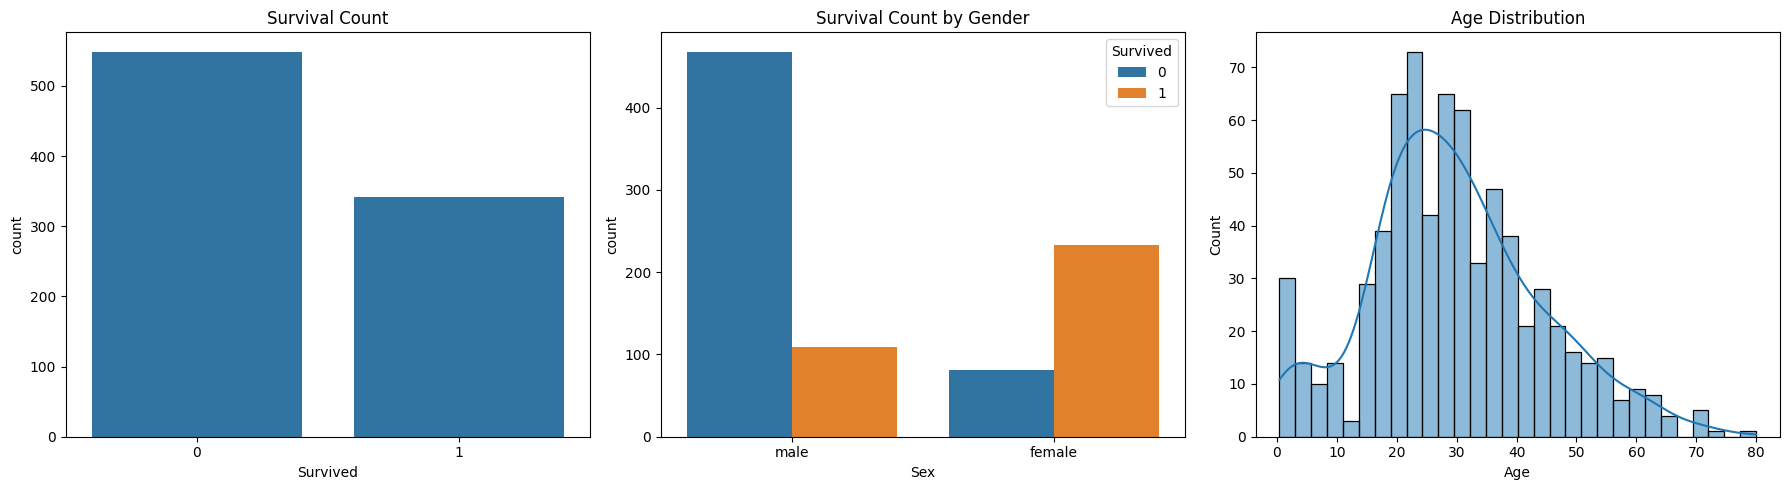

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../Datasets/Titanic_dataset_train.csv"
df = pd.read_csv(file_path)

# Create a figure with three subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Check survival distribution
sns.countplot(x="Survived", data=df, ax=axes[0])
axes[0].set_title("Survival Count")

# Visualizing the impact of gender
sns.countplot(x="Sex", hue="Survived", data=df, ax=axes[1])
axes[1].set_title("Survival Count by Gender")

# Distribution of age
sns.histplot(df["Age"].dropna(), bins=30, kde=True, ax=axes[2])
axes[2].set_title("Age Distribution")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with mode
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=["Cabin"], inplace=True)

# Convert 'Sex' column to numeric
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

# One-hot encode 'Embarked' column
df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df.head()

## Step 2: Splitting the Dataset
Split features and label columns and then split samples for Train and Test sets.

In [6]:
from sklearn.model_selection import train_test_split

# Select features and target variable
features = ["Pclass", "Sex", "Age", "Fare", "Embarked_Q", "Embarked_S"]
X = df[features]
y = df["Survived"]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((712, 6), (179, 6))

## Step 3: Train the Naïve Bayes Model and Compare with Logistic Regression
We will now train a **Gaussian Naïve Bayes** model and compare it with our previously learned **Logistic Regression** model.


In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Initialize and train the Naïve Bayes and Logistic Regression model
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)

# Train the modela
nb_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

## Step 4: Evaluate Model Performance
We evaluate the model using accuracy, confusion matrix, and classification report.


In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")

# Generate confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Naïve Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)

# Generate classification report
class_report_nb = classification_report(y_test, y_pred_nb)
class_report_lr = classification_report(y_test, y_pred_lr)
print("Naïve Bayes Classification Report:\n", class_report_nb)
print("Logistic Regression Classification Report:\n", class_report_lr)

Naïve Bayes Accuracy: 0.7654
Logistic Regression Accuracy: 0.7989
Naïve Bayes Confusion Matrix:
 [[82 23]
 [19 55]]
Logistic Regression Confusion Matrix:
 [[88 17]
 [19 55]]
Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### **Key Learning Points**:
- **Accuracy**: Measures the overall performance of the classifier by calculating the fraction of correctly classified samples among all samples.
- **Confusion Matrix**: Displays counts of actual vs. predicted labels, helping identify where the classifier is confusing one class for another (i.e., true positives, false positives, true negatives, and false negatives).
- **Precision, Recall, F1-score**:
  - **Precision**: Out of the samples predicted as positive, how many were actually positive?
  - **Recall**: Out of all the actual positive samples, how many were correctly identified as positive?
  - **F1-score**: The harmonic mean of precision and recall, balancing both metrics.
- **Macro Avg**: Averages the metric (e.g., precision, recall, or F1) for each class equally, regardless of class size.
- **Weighted Avg**: Averages the metric for each class, weighted by the number of samples (support) in that class—useful if there is class imbalance.
- **Support**: The number of actual occurrences of each class in the dataset (i.e., how many samples belong to each class).

# **Is Accuracy Enough?**

## Step 1: The Problem with Accuracy in Binary Classification
Accuracy is often the first metric we check when evaluating a classification model. In our Titanic survival prediction task:

- **Logistic Regression Accuracy**: 80%
- **Naïve Bayes Accuracy**: 77%

At first glance, we might assume Logistic Regression is the better model. But **is accuracy alone enough?** The answer is **no**, especially in the case of **imbalanced datasets**.

### **Example of Class Imbalance**
Suppose we have a dataset where **90%** of passengers did **not survive**, and only **10%** survived. A naive classifier that always predicts "Not Survived" would be **90% accurate**, but it would completely fail to identify the survivors.

Thus, we need **better metrics** that account for the model’s ability to correctly classify **both** classes.

## Step 2: The Need for a Confusion Matrix
Instead of relying on a single accuracy value, we break down predictions into:

- **True Positives (TP)**: Correctly predicted survivors.
- **True Negatives (TN)**: Correctly predicted non-survivors.
- **False Positives (FP)**: Incorrectly predicted survivors (Type I error).
- **False Negatives (FN)**: Incorrectly predicted non-survivors (Type II error).

Let's compute the **confusion matrix** for both models.


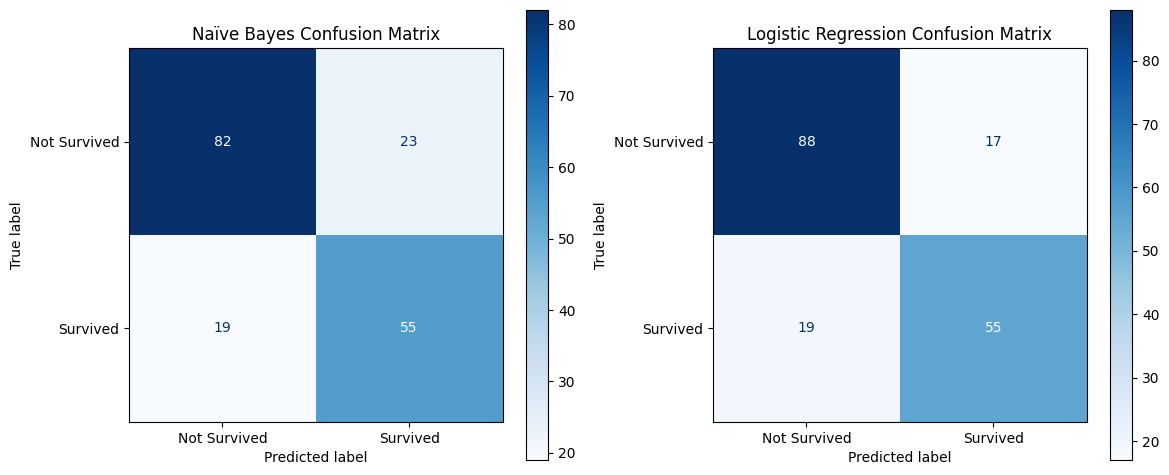

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for Naïve Bayes and Logistic Regression
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Naïve Bayes
disp_nb = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_nb, display_labels=["Not Survived", "Survived"])
disp_nb.plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Naïve Bayes Confusion Matrix")

# Logistic Regression
disp_lr = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_lr, display_labels=["Not Survived", "Survived"])
disp_lr.plot(ax=axes[1], cmap="Blues")
axes[1].set_title("Logistic Regression Confusion Matrix")

plt.tight_layout()
plt.show()

### **Why is the Confusion Matrix Important?**
- If **False Negatives** are high, the model is missing too many survivors.
- If **False Positives** are high, the model is predicting survival for those who didn’t actually survive.
- Accuracy does **not** show these errors, but the confusion matrix does.

---

## **Step 3: Choosing the Right Metric**
Now that we have the confusion matrix, we need a single number to compare models.

### **1. Precision (Positive Predictive Value)**
- Measures how many predicted survivors were actually survivors.
- Important when **False Positives** are costly (e.g., wrongly predicting someone will survive).
  
$\text{Precision} = \frac{TP}{TP + FP}$

In [15]:
from sklearn.metrics import precision_score

precision_lr = precision_score(y_test, y_pred_lr)
precision_nb = precision_score(y_test, y_pred_nb)

print(f"Logistic Regression Precision: {precision_lr:.4f}")
print(f"Naïve Bayes Precision: {precision_nb:.4f}")

Logistic Regression Precision: 0.7639
Naïve Bayes Precision: 0.7051



### **2. Recall (Sensitivity)**
- Measures how many actual survivors were correctly predicted.
- Important when **False Negatives** are costly (e.g., missing people who should have survived).
  
$\text{Recall} = \frac{TP}{TP + FN}$

In [17]:
from sklearn.metrics import recall_score

recall_lr = recall_score(y_test, y_pred_lr)
recall_nb = recall_score(y_test, y_pred_nb)

print(f"Logistic Regression Recall: {recall_lr:.4f}")
print(f"Naïve Bayes Recall: {recall_nb:.4f}")

Logistic Regression Recall: 0.7432
Naïve Bayes Recall: 0.7432



### **3. F1-Score (Balanced Metric)**
If we want **both Precision and Recall**, we use **F1-score**, which balances them.

$F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$


In [18]:
from sklearn.metrics import f1_score

f1_lr = f1_score(y_test, y_pred_lr)
f1_nb = f1_score(y_test, y_pred_nb)

print(f"Logistic Regression F1-Score: {f1_lr:.4f}")
print(f"Naïve Bayes F1-Score: {f1_nb:.4f}")


Logistic Regression F1-Score: 0.7534
Naïve Bayes F1-Score: 0.7237


### **Which Model is Better?**
- If we care about **overall performance**, we should focus on **F1-score**.
- If we want to **reduce false positives**, we should prioritize **Precision**.
- If we want to **reduce false negatives**, we should prioritize **Recall**.


## **Step 5: Conclusion**
- **Accuracy is misleading** if the dataset is imbalanced.
- **Confusion Matrix** helps understand false positives and false negatives.
- **Precision, Recall, and F1-score** provide a more detailed evaluation.
- Choosing the **best metric** depends on the problem:
  - **Medical Diagnosis?** High **Recall** (don't miss real cases).
  - **Spam Detection?** High **Precision** (avoid false positives).
  - **General Classification?** Use **F1-score**.

🚀 **Final Tip**: Always look beyond accuracy! Compare models using multiple metrics to make an informed decision.